Imports and data loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('pokemon.csv')

Adding new column 'generation'

In [2]:
data['generation'] = ''
data.loc[data.national_number <= 151, 'generation'] = 1
data.loc[(data.national_number >= 152) & (data.national_number <= 251), 'generation'] = 2
data.loc[(data.national_number >= 252) & (data.national_number <= 386), 'generation'] = 3
data.loc[(data.national_number >= 387) & (data.national_number <= 493), 'generation'] = 4
data.loc[(data.national_number >= 494) & (data.national_number <= 649), 'generation'] = 5
data.loc[(data.national_number >= 650) & (data.national_number <= 721), 'generation'] = 6
data.loc[(data.national_number >= 722) & (data.national_number <= 809), 'generation'] = 7
data.loc[(data.national_number >= 810) & (data.national_number <= 890), 'generation'] = 8

Removing Partner pokemons and setting Mega, Alolan and Galarian forms to gen 6, 7 and 8 respectively.
It also removes duplicated pokemon (same name and stats)

In [3]:
prefix = []
data['ignore'] = False

for i, row in data.iterrows():
    fn_split = row['full_name'].split()
    if len(fn_split) != 1:
        if fn_split[0] == 'Partner':
            data.at[i,'ignore'] = True
        elif fn_split[0] == 'Mega':
            data.at[i,'generation'] = 6
        elif fn_split[0] == 'Alolan':
            data.at[i,'generation'] = 7
        elif fn_split[0] == 'Galarian':
            data.at[i,'generation'] = 8
        else:
            prefix.append(fn_split[0])

data = data[~data.ignore]
data.drop(['ignore'],axis=1,inplace=True)
data = data[~data.duplicated(subset=data.columns[2:])]

Bar plot of number of pokémons per generation

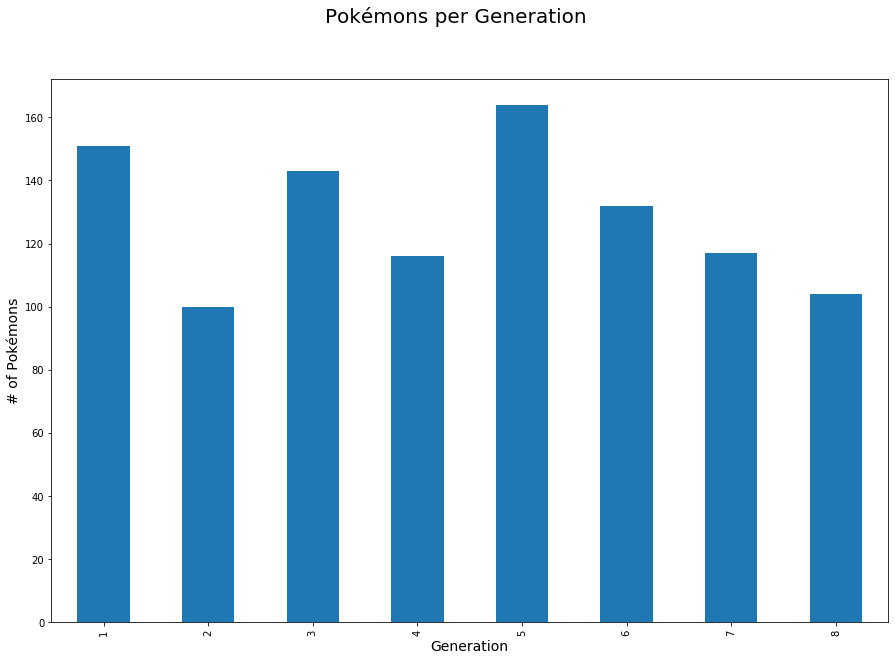

In [4]:
plot = data.generation.value_counts(sort=False).plot(kind='bar',figsize=(15,10))
fig = plot.get_figure()
fig.suptitle('Pokémons per Generation', fontsize=20)
plot.set_xlabel('Generation', fontsize=14)
plot.set_ylabel('# of Pokémons', fontsize=14)
fig.savefig('img/genchart.png')

Function to plot the number of Pokémons per generation according to the parameter, if invalid number is passed, plots all generation.

In [5]:
def plot_type_chart(gen=0):
    plus_title = ''
    plus_file = '.png'
    types = None
    if gen < 1 or gen > 8:
        types = data.type1.value_counts().add(data.type2.value_counts(), fill_value=0)
    else:
        filtered = data[data.generation == gen]
        types = filtered.type1.value_counts().add(filtered.type2.value_counts(),fill_value=0)
        plus_title = f' (Gen {gen})'
        plus_file = f'_gen{gen}.png'

    plot = types.plot(kind='bar',figsize=(15,10))
    fig = plot.get_figure()
    fig.suptitle('Number of Pokémons per Type'+plus_title, fontsize=20)
    plot.set_xlabel('Type', fontsize=14)
    plot.set_ylabel('# of Pokémons', fontsize=14)
    fig.savefig(f'img/type/typechart{plus_file}')
    return plot

Uses the above function for all generations. plot.cla() is called to clear the plot and generate the correct plot for each file.

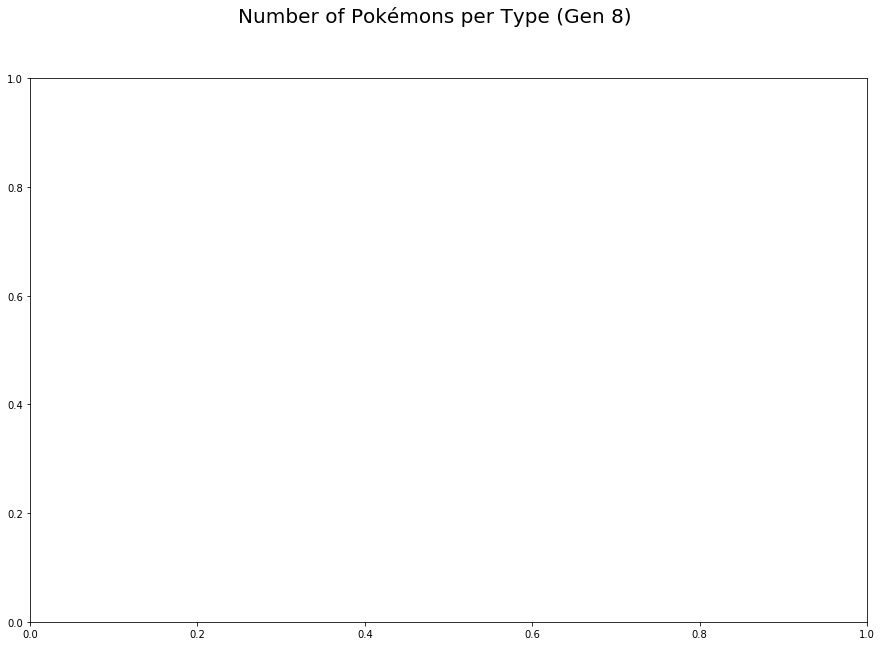

In [6]:
for i in np.arange(9):
    plot = plot_type_chart(gen=i)
    plot.cla()

Overlay bar plot of the number of pokémons per generation

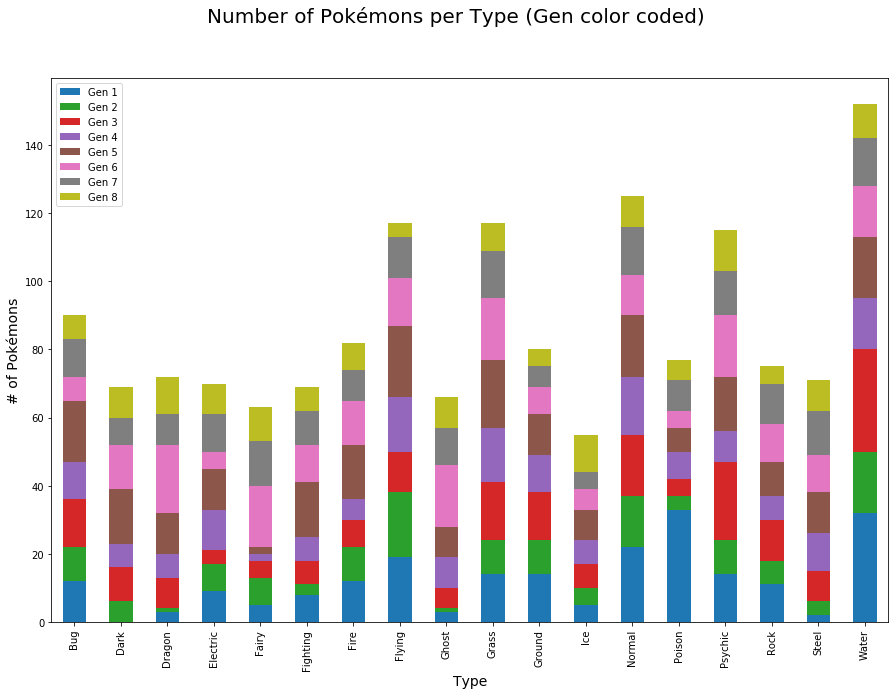

In [7]:
filtered = data[data.generation == 1]
typesgen1 = filtered.type1.value_counts().add(filtered.type2.value_counts(),fill_value=0)
typesgen1['Dark'] = 0
typesgen1 = typesgen1.sort_index()

sum_bottom = typesgen1
plot = typesgen1.plot(kind='bar',color='C0',figsize=(15,10))
legend = ['Gen 1']

for i in np.arange(2,9):
    filtered = data[data.generation == i]
    curr_types = filtered.type1.value_counts().add(filtered.type2.value_counts(),fill_value=0)
    curr_types.plot(kind='bar',bottom=sum_bottom,color='C'+str(i))
    sum_bottom = sum_bottom.add(curr_types)
    legend.append('Gen '+str(i))
    
plus_title = ''
plus_file = ''

fig = plot.get_figure()
fig.suptitle('Number of Pokémons per Type (Gen color coded)', fontsize=20)
plot.set_xlabel('Type', fontsize=14)
plot.set_ylabel('# of Pokémons', fontsize=14)
plot.legend(legend)
fig.savefig('img/type/typechart_gen_color.png')

Line plot of number of pokemons per type in each generation

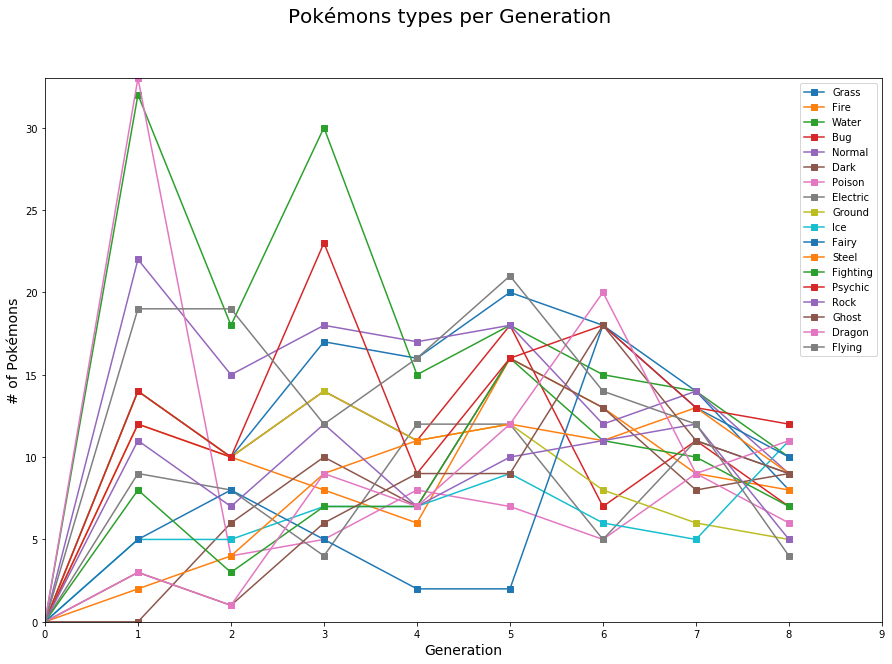

In [8]:
i = 0
legend = []
for type_name in data.type1.unique():
    if pd.isnull(type_name):
        continue
    gen_type = data[(data.type1==type_name) | (data.type2==type_name)].groupby('generation').count().national_number
    gen_type = gen_type.add(pd.Series([0]*9),fill_value=0)
    plot = gen_type.plot(xlim=(0,9),ylim=(0,33),figsize=(15,10),style='s-')
    legend.append(type_name)
    
plot.set_xlabel('Generation', fontsize=14)
plot.set_ylabel('# of Pokémons', fontsize=14)
plot.legend(legend)
fig = plot.get_figure()
fig.suptitle('Pokémons types per Generation', fontsize=20)
fig.savefig('img/type/all_types_generation.png')
                            